<a href="https://colab.research.google.com/github/ShivaniH2020/Repository/blob/main/Assignment1Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import keras

print('Pandas: {}'.format(pd.__version__))
print('Numpy: {}'.format(np.__version__))
print('Sklearn: {}'.format(sklearn.__version__))
print('Matplotlib: {}'.format(matplotlib.__version__))
print('Keras: {}'.format(keras.__version__))

Pandas: 1.1.5
Numpy: 1.19.5
Sklearn: 0.22.2.post1
Matplotlib: 3.2.2
Keras: 2.4.3


In [3]:
dataset = pd.read_excel('/content/drive/My Drive/heart.xls')
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233.0,1,0.0,150.0,0.0,2.3,0,0,1,1
1,37,1,2,130,250.0,0,1.0,187.0,0.0,3.5,0,0,2,1
2,41,0,1,130,204.0,0,0.0,172.0,0.0,1.4,2,0,2,1
3,56,1,1,120,236.0,0,1.0,178.0,0.0,0.8,2,0,2,1
4,57,0,0,120,354.0,0,1.0,163.0,1.0,0.6,2,0,2,1


In [4]:
data_with_NaN = dataset[~dataset.isin(['?'])]
preprocessed_data = data_with_NaN.dropna(axis=0)
preprocessed_data.loc[280:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
280,42,1,0,136,315.0,0,1.0,125.0,1.0,1.8,1,0,1,0
281,52,1,0,128,204.0,1,1.0,156.0,1.0,1.0,1,0,0,0
283,40,1,0,152,223.0,0,1.0,181.0,0.0,0.0,2,0,3,0
284,61,1,0,140,207.0,0,0.0,138.0,1.0,1.9,2,1,3,0
286,59,1,3,134,204.0,0,1.0,162.0,0.0,0.8,2,2,2,0
287,57,1,1,154,232.0,0,0.0,164.0,0.0,0.0,2,1,2,0
288,57,1,0,110,335.0,0,1.0,143.0,1.0,3.0,1,1,3,0
289,55,0,0,128,205.0,0,2.0,130.0,1.0,2.0,1,1,3,0
290,61,1,0,148,203.0,0,1.0,161.0,0.0,0.0,2,1,3,0
291,58,1,0,114,318.0,0,2.0,140.0,0.0,4.4,0,3,1,0


In [5]:
data=preprocessed_data
print(data.shape)
print(data.dtypes)

(299, 14)
age           int64
sex           int64
cp            int64
trestbps      int64
chol        float64
fbs           int64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


In [6]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,54.341137,0.682274,0.969900,131.591973,246.374582,0.147157,0.528428,149.735786,0.324415,1.026756,1.401338,0.719064,2.314381,0.551839
std,9.111024,0.466373,1.034196,17.638828,51.899815,0.354856,0.526188,22.930602,0.468941,1.151751,0.618071,1.023878,0.608795,0.498139
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,134.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
X = np.array(data.drop(['target'], 1))
Y = np.array(data['target'])

In [8]:
mean = X.mean(axis=0)
X -= mean
std = X.std(axis=0)
X /= std

In [9]:
from sklearn import model_selection
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, random_state=42, test_size = 0.2)

In [10]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Dropout
from keras import regularizers


def create_neuralnetworkmodel():
    # create model
    model = Sequential([
                      Dense(16, input_dim=13, activation='relu'),  
                      Dropout(0.25),
                      Dense(8, activation='relu'),
                      Dropout(0.25),
                      Dense(1, activation='sigmoid')
    ])
    # Compile model
    adam = Adam(lr=0.001)
    model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

neural_model = create_neuralnetworkmodel()

print(neural_model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                224       
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dropout_1 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 369
Trainable params: 369
Non-trainable params: 0
_________________________________________________________________
None


In [11]:
modelfitting=neural_model.fit(X_train, Y_train, validation_data=(X_test, Y_test),epochs=40, batch_size=10)

Epoch 1/40
24/24 [==============================] - 1s 20ms/step - loss: 0.7625 - accuracy: 0.5467 - val_loss: 0.6796 - val_accuracy: 0.6333
Epoch 2/40
24/24 [==============================] - 0s 3ms/step - loss: 0.7166 - accuracy: 0.5632 - val_loss: 0.6596 - val_accuracy: 0.6333
Epoch 3/40
24/24 [==============================] - 0s 2ms/step - loss: 0.7271 - accuracy: 0.5420 - val_loss: 0.6403 - val_accuracy: 0.6000
Epoch 4/40
24/24 [==============================] - 0s 3ms/step - loss: 0.6626 - accuracy: 0.5598 - val_loss: 0.6225 - val_accuracy: 0.6000
Epoch 5/40
24/24 [==============================] - 0s 3ms/step - loss: 0.6814 - accuracy: 0.6260 - val_loss: 0.6113 - val_accuracy: 0.6667
Epoch 6/40
24/24 [==============================] - 0s 3ms/step - loss: 0.6306 - accuracy: 0.6971 - val_loss: 0.6009 - val_accuracy: 0.6667
Epoch 7/40
24/24 [==============================] - 0s 3ms/step - loss: 0.6132 - accuracy: 0.6931 - val_loss: 0.5884 - val_accuracy: 0.6667
Epoch 8/40
24/24 [=

In [12]:
predictions=neural_model.predict(X)
final_binary_prediction=(predictions > 0.5).astype( np.int32 )

In [13]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true=Y, y_pred=final_binary_prediction)

def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Greens):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    print(compile)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Actual target')
    plt.xlabel('Predicted target')

    
   

In [15]:
ClassLabels = ['no_cardiac_disease','had_cardiac_disease']


<built-in function compile>


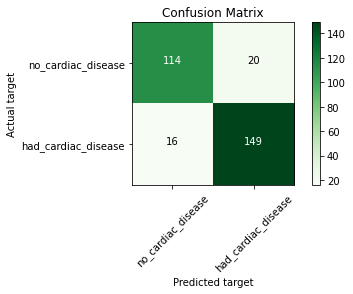

In [16]:
 plot_confusion_matrix(cm=cm,classes=ClassLabels,title='Confusion Matrix')

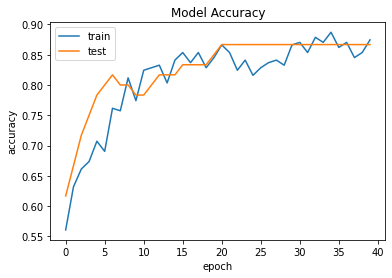

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# Model accuracy
plt.plot(modelfitting.history['accuracy'])
plt.plot(modelfitting.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

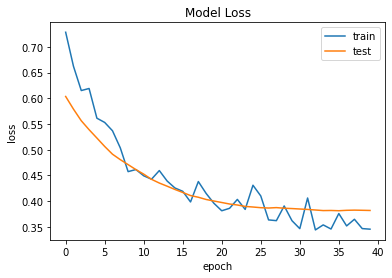

In [ ]:
# Model Losss
plt.plot(modelfitting.history['loss'])
plt.plot(modelfitting.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [17]:
from sklearn import model_selection
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, random_state=42, test_size = 0.5)

In [18]:
modelfitting=neural_model.fit(X_train, Y_train, validation_data=(X_test, Y_test),epochs=40, batch_size=10)

Epoch 1/40
15/15 [==============================] - 0s 10ms/step - loss: 0.4007 - accuracy: 0.8658 - val_loss: 0.4278 - val_accuracy: 0.8467
Epoch 2/40
15/15 [==============================] - 0s 6ms/step - loss: 0.4086 - accuracy: 0.8926 - val_loss: 0.4304 - val_accuracy: 0.8267
Epoch 3/40
15/15 [==============================] - 0s 5ms/step - loss: 0.4140 - accuracy: 0.8792 - val_loss: 0.4327 - val_accuracy: 0.8133
Epoch 4/40
15/15 [==============================] - 0s 6ms/step - loss: 0.3726 - accuracy: 0.9262 - val_loss: 0.4356 - val_accuracy: 0.8133
Epoch 5/40
15/15 [==============================] - 0s 6ms/step - loss: 0.3717 - accuracy: 0.8859 - val_loss: 0.4375 - val_accuracy: 0.8067
Epoch 6/40
15/15 [==============================] - 0s 5ms/step - loss: 0.3803 - accuracy: 0.8993 - val_loss: 0.4404 - val_accuracy: 0.8133
Epoch 7/40
15/15 [==============================] - 0s 7ms/step - loss: 0.3810 - accuracy: 0.8859 - val_loss: 0.4440 - val_accuracy: 0.8133
Epoch 8/40
15/15 [=

In [19]:
predictions=neural_model.predict(X)
final_binary_prediction=(predictions > 0.5).astype( np.int32 )

<built-in function compile>


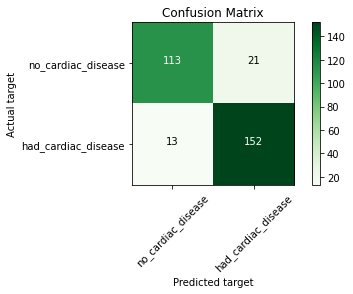

In [21]:
cm = confusion_matrix(y_true=Y, y_pred=final_binary_prediction)
plot_confusion_matrix(cm=cm,classes=ClassLabels,title='Confusion Matrix')

In [23]:
from sklearn import model_selection
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, random_state=42, test_size = 0.4)

In [24]:
modelfitting=neural_model.fit(X_train, Y_train, validation_data=(X_test, Y_test),epochs=40, batch_size=10)

Epoch 1/40
18/18 [==============================] - 0s 8ms/step - loss: 0.3808 - accuracy: 0.9218 - val_loss: 0.4899 - val_accuracy: 0.8167
Epoch 2/40
18/18 [==============================] - 0s 5ms/step - loss: 0.3927 - accuracy: 0.9330 - val_loss: 0.4849 - val_accuracy: 0.8083
Epoch 3/40
18/18 [==============================] - 0s 5ms/step - loss: 0.3627 - accuracy: 0.9106 - val_loss: 0.4821 - val_accuracy: 0.8083
Epoch 4/40
18/18 [==============================] - 0s 5ms/step - loss: 0.3792 - accuracy: 0.9050 - val_loss: 0.4764 - val_accuracy: 0.7917
Epoch 5/40
18/18 [==============================] - 0s 5ms/step - loss: 0.3389 - accuracy: 0.9106 - val_loss: 0.4771 - val_accuracy: 0.7917
Epoch 6/40
18/18 [==============================] - 0s 4ms/step - loss: 0.3243 - accuracy: 0.9162 - val_loss: 0.4781 - val_accuracy: 0.7917
Epoch 7/40
18/18 [==============================] - 0s 4ms/step - loss: 0.3887 - accuracy: 0.9050 - val_loss: 0.4749 - val_accuracy: 0.8000
Epoch 8/40
18/18 [==

In [25]:
predictions=neural_model.predict(X)
final_binary_prediction=(predictions > 0.5).astype( np.int32 )

<built-in function compile>


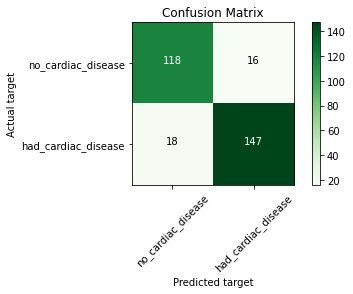

In [26]:
cm = confusion_matrix(y_true=Y, y_pred=final_binary_prediction)
plot_confusion_matrix(cm=cm,classes=ClassLabels,title='Confusion Matrix')

In [27]:
from sklearn import model_selection
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, random_state=42, test_size = 0.3)

In [28]:
modelfitting=neural_model.fit(X_train, Y_train, validation_data=(X_test, Y_test),epochs=40, batch_size=10)

Epoch 1/40
21/21 [==============================] - 0s 5ms/step - loss: 0.3401 - accuracy: 0.8708 - val_loss: 0.4591 - val_accuracy: 0.8222
Epoch 2/40
21/21 [==============================] - 0s 3ms/step - loss: 0.3500 - accuracy: 0.8804 - val_loss: 0.4554 - val_accuracy: 0.8111
Epoch 3/40
21/21 [==============================] - 0s 3ms/step - loss: 0.3353 - accuracy: 0.8708 - val_loss: 0.4501 - val_accuracy: 0.8111
Epoch 4/40
21/21 [==============================] - 0s 3ms/step - loss: 0.3559 - accuracy: 0.8852 - val_loss: 0.4478 - val_accuracy: 0.8111
Epoch 5/40
21/21 [==============================] - 0s 3ms/step - loss: 0.3563 - accuracy: 0.8900 - val_loss: 0.4452 - val_accuracy: 0.8111
Epoch 6/40
21/21 [==============================] - 0s 3ms/step - loss: 0.2922 - accuracy: 0.9043 - val_loss: 0.4413 - val_accuracy: 0.8222
Epoch 7/40
21/21 [==============================] - 0s 4ms/step - loss: 0.2978 - accuracy: 0.9043 - val_loss: 0.4360 - val_accuracy: 0.8333
Epoch 8/40
21/21 [==

In [29]:
predictions=neural_model.predict(X)
final_binary_prediction=(predictions > 0.5).astype( np.int32 )

<built-in function compile>


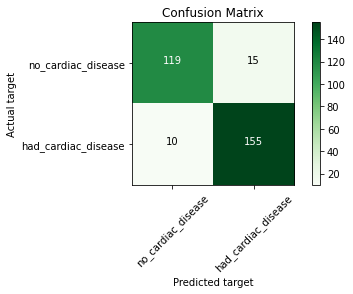

In [30]:
cm = confusion_matrix(y_true=Y, y_pred=final_binary_prediction)
plot_confusion_matrix(cm=cm,classes=ClassLabels,title='Confusion Matrix')

In [31]:
from sklearn import model_selection
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, random_state=42, test_size = 0.1)

In [32]:
modelfitting=neural_model.fit(X_train, Y_train, validation_data=(X_test, Y_test),epochs=40, batch_size=10)

Epoch 1/40
27/27 [==============================] - 0s 4ms/step - loss: 0.3072 - accuracy: 0.8699 - val_loss: 0.4271 - val_accuracy: 0.8333
Epoch 2/40
27/27 [==============================] - 0s 2ms/step - loss: 0.3156 - accuracy: 0.8848 - val_loss: 0.4250 - val_accuracy: 0.8333
Epoch 3/40
27/27 [==============================] - 0s 2ms/step - loss: 0.3205 - accuracy: 0.8662 - val_loss: 0.4180 - val_accuracy: 0.8333
Epoch 4/40
27/27 [==============================] - 0s 2ms/step - loss: 0.2991 - accuracy: 0.8773 - val_loss: 0.4202 - val_accuracy: 0.8333
Epoch 5/40
27/27 [==============================] - 0s 2ms/step - loss: 0.3388 - accuracy: 0.8773 - val_loss: 0.4233 - val_accuracy: 0.8333
Epoch 6/40
27/27 [==============================] - 0s 3ms/step - loss: 0.3093 - accuracy: 0.8587 - val_loss: 0.4182 - val_accuracy: 0.8333
Epoch 7/40
27/27 [==============================] - 0s 2ms/step - loss: 0.2916 - accuracy: 0.8848 - val_loss: 0.4136 - val_accuracy: 0.8333
Epoch 8/40
27/27 [==

In [33]:
predictions=neural_model.predict(X)
final_binary_prediction=(predictions > 0.5).astype( np.int32 )

<built-in function compile>


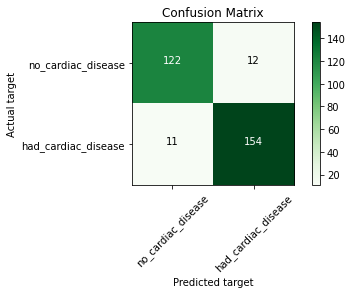

In [34]:
cm = confusion_matrix(y_true=Y, y_pred=final_binary_prediction)
plot_confusion_matrix(cm=cm,classes=ClassLabels,title='Confusion Matrix')